In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

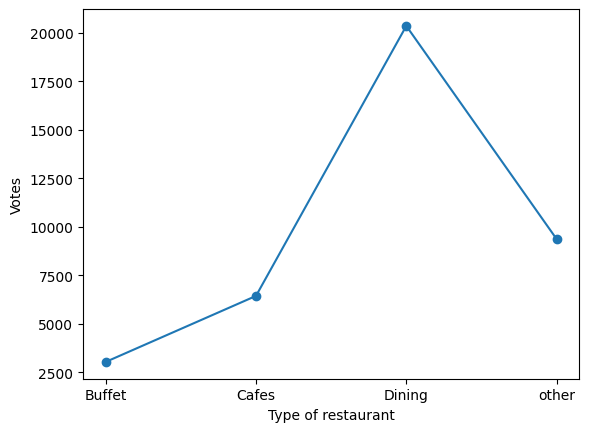

In [15]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker = 'o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [21]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print(restaurant_with_max_votes)

38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

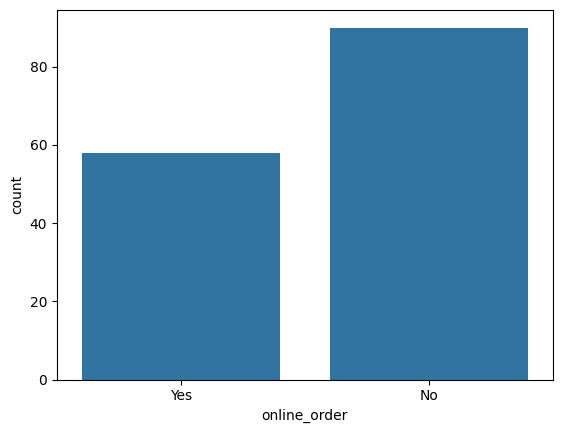

In [23]:
sns.countplot(x = df['online_order'])

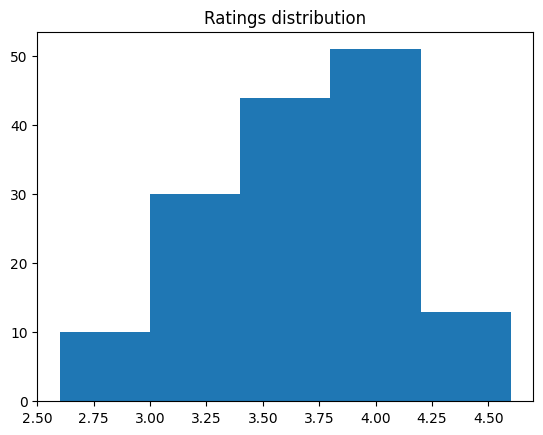

In [25]:
plt.hist(df['rate'], bins = 5)
plt.title('Ratings distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

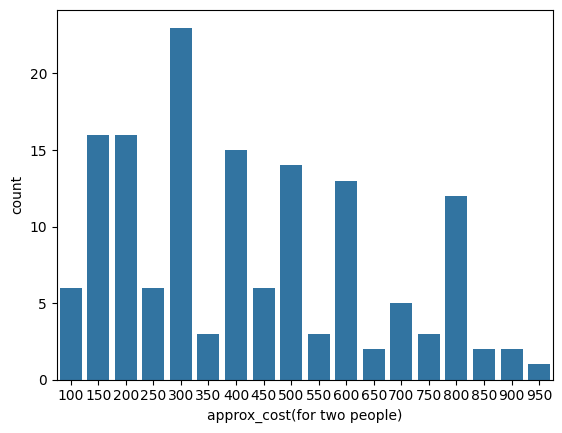

In [27]:
sns.countplot(x = df['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

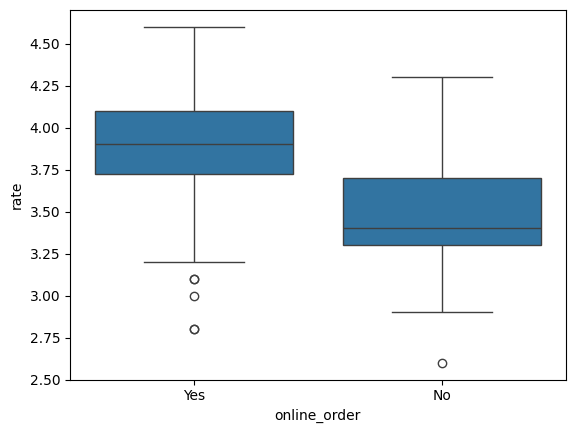

In [29]:
sns.boxplot(x = 'online_order', y = 'rate', data = df)

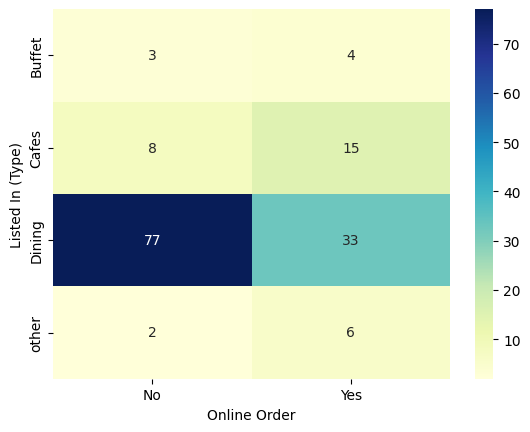

In [31]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap = 'YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()